In [1]:
import requests
import nltk
from wordcloud import WordCloud, STOPWORDS
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from bs4 import BeautifulSoup

In [2]:
movie_rev = []

In [3]:
for i in range(1,11):
  ip=[]  
  url="https://www.imdb.com/title/tt0848228/reviews/?ref_=tt_ql_urv"+str(i)
  response = requests.get(url)
  soup = BeautifulSoup(response.content,"html.parser")# creating soup object to iterate over the extracted content 
  reviews = soup.find_all("div",attrs={"class","show-more__control"})# Extracting the content under specific tags
  for i in range(len(reviews)):
    ip.append(reviews[i].text) 
  movie_rev = movie_rev+ip  # adding the reviews of one page to empty list which in future contains all the reviews

In [4]:
movie_rev

['At this point, "The Avengers" has made around 100 trillion dollars (or so)--and so it\'s obvious that people love the film. My own daughter went to the premier in New York and then went to it on opening night in general release--and was mad I didn\'t take her with me tonight to see it! Obviously, she loved the film as well. As for me, I liked it but didn\'t quite share the overall exuberance for the film. Mind you, I liked it--but I think I preferred the earlier films before the Avengers team was formed. There was a certain charm that I didn\'t quite see recaptured in the film. Now the film is good--it\'s just that what I like in these other films I would have liked more of in "The Avengers". Specifically, the movie could have used a bit more humor and a bit more character development. When I read the IMDb trivia, it seems that originally the film had about 30 more minutes--all showing Steve Rogers (Captain America) trying to adjust to his new life. I would have LOVED seeing all this

In [5]:
with open("movie.txt", "w", encoding = "utf-8") as rev:
    rev.write(str(movie_rev))

In [6]:
type(movie_rev), len(movie_rev)    # contains list of strings, total number of list

(list, 630)

In [7]:
rev_string = " ".join(movie_rev)     # converting all word into strring and join by space(space delimiter)

In [8]:
len(rev_string)  # 

476479

In [9]:
rev_string

'At this point, "The Avengers" has made around 100 trillion dollars (or so)--and so it\'s obvious that people love the film. My own daughter went to the premier in New York and then went to it on opening night in general release--and was mad I didn\'t take her with me tonight to see it! Obviously, she loved the film as well. As for me, I liked it but didn\'t quite share the overall exuberance for the film. Mind you, I liked it--but I think I preferred the earlier films before the Avengers team was formed. There was a certain charm that I didn\'t quite see recaptured in the film. Now the film is good--it\'s just that what I like in these other films I would have liked more of in "The Avengers". Specifically, the movie could have used a bit more humor and a bit more character development. When I read the IMDb trivia, it seems that originally the film had about 30 more minutes--all showing Steve Rogers (Captain America) trying to adjust to his new life. I would have LOVED seeing all this-

In [10]:
def cleaning_text(i):
    i = re.sub("[^A-Za-z" "]+"," ",i).lower() 
    w = []
    for word in i.split(" "):
        if len(word)>2:
            w.append(word)
    return (" ".join(w))

In [11]:
clean_rev = cleaning_text(rev_string)
clean_rev

'this point the avengers has made around trillion dollars and obvious that people love the film own daughter went the premier new york and then went opening night general release and was mad didn take her with tonight see obviously she loved the film well for liked but didn quite share the overall exuberance for the film mind you liked but think preferred the earlier films before the avengers team was formed there was certain charm that didn quite see recaptured the film now the film good just that what like these other films would have liked more the avengers specifically the movie could have used bit more humor and bit more character development when read the imdb trivia seems that originally the film had about more minutes all showing steve rogers captain america trying adjust his new life would have loved seeing all this and less the huge battle the end the film for just felt numbing after while and would have liked more the characters when they weren fighting again however did lik

In [12]:
rev_words = clean_rev.split(" ")
rev_words

['this',
 'point',
 'the',
 'avengers',
 'has',
 'made',
 'around',
 'trillion',
 'dollars',
 'and',
 'obvious',
 'that',
 'people',
 'love',
 'the',
 'film',
 'own',
 'daughter',
 'went',
 'the',
 'premier',
 'new',
 'york',
 'and',
 'then',
 'went',
 'opening',
 'night',
 'general',
 'release',
 'and',
 'was',
 'mad',
 'didn',
 'take',
 'her',
 'with',
 'tonight',
 'see',
 'obviously',
 'she',
 'loved',
 'the',
 'film',
 'well',
 'for',
 'liked',
 'but',
 'didn',
 'quite',
 'share',
 'the',
 'overall',
 'exuberance',
 'for',
 'the',
 'film',
 'mind',
 'you',
 'liked',
 'but',
 'think',
 'preferred',
 'the',
 'earlier',
 'films',
 'before',
 'the',
 'avengers',
 'team',
 'was',
 'formed',
 'there',
 'was',
 'certain',
 'charm',
 'that',
 'didn',
 'quite',
 'see',
 'recaptured',
 'the',
 'film',
 'now',
 'the',
 'film',
 'good',
 'just',
 'that',
 'what',
 'like',
 'these',
 'other',
 'films',
 'would',
 'have',
 'liked',
 'more',
 'the',
 'avengers',
 'specifically',
 'the',
 'movie',

In [13]:
# Custom Stopwords
with open("stopwords_en.txt","r") as sw:
    stop_words = sw.read()

In [14]:
stop_words = stop_words.split("\n")

In [15]:
stop_words

['a',
 "a's",
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after',
 'afterwards',
 'again',
 'against',
 "ain't",
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apart',
 'appear',
 'appreciate',
 'appropriate',
 'are',
 "aren't",
 'around',
 'as',
 'aside',
 'ask',
 'asking',
 'associated',
 'at',
 'available',
 'away',
 'awfully',
 'b',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'believe',
 'below',
 'beside',
 'besides',
 'best',
 'better',
 'between',
 'beyond',
 'both',
 'brief',
 'but',
 'by',
 'c',
 "c'mon",
 "c's",
 'came',
 'can',
 "can't",
 'cannot',
 'cant',
 'cause',
 'causes',
 'certain',
 'certainly',
 'changes',
 'clearly',
 'co',
 'com',
 'come',
 'c

In [16]:
stop_words.extend(["movie", "movies", "marval", "avenger", "film", "characters"])

In [17]:
rev_words = [w for w in rev_words if not w in stop_words]

In [18]:
rev_words

['point',
 'avengers',
 'made',
 'trillion',
 'dollars',
 'obvious',
 'people',
 'love',
 'daughter',
 'premier',
 'york',
 'opening',
 'night',
 'general',
 'release',
 'mad',
 'didn',
 'tonight',
 'loved',
 'didn',
 'share',
 'exuberance',
 'mind',
 'preferred',
 'earlier',
 'films',
 'avengers',
 'team',
 'formed',
 'charm',
 'didn',
 'recaptured',
 'good',
 'films',
 'avengers',
 'specifically',
 'bit',
 'humor',
 'bit',
 'character',
 'development',
 'read',
 'imdb',
 'trivia',
 'originally',
 'minutes',
 'showing',
 'steve',
 'rogers',
 'captain',
 'america',
 'adjust',
 'life',
 'loved',
 'huge',
 'battle',
 'end',
 'felt',
 'numbing',
 'weren',
 'fighting',
 'earlier',
 'marvel',
 'disney',
 'films',
 'bit',
 'cents',
 'worth',
 'superhero',
 'films',
 'fun',
 'watch',
 'degree',
 'understandable',
 'people',
 'wouldn',
 'totally',
 'enamoured',
 'lot',
 'negative',
 'comments',
 'lot',
 'condescending',
 'ignorant',
 'conspiracy',
 'theories',
 'worthy',
 'called',
 'reviews',

In [19]:
clean_rev_string = " ".join(rev_words)
clean_rev_string

'point avengers made trillion dollars obvious people love daughter premier york opening night general release mad didn tonight loved didn share exuberance mind preferred earlier films avengers team formed charm didn recaptured good films avengers specifically bit humor bit character development read imdb trivia originally minutes showing steve rogers captain america adjust life loved huge battle end felt numbing weren fighting earlier marvel disney films bit cents worth superhero films fun watch degree understandable people wouldn totally enamoured lot negative comments lot condescending ignorant conspiracy theories worthy called reviews avengers assemble fun intelligent superhero true story formulaic extent distracting fact complaint performances didn work personally jeremy renner dull side hawkeye character development rushed underwritten hawkeye demons made clear strongly rest performances great big shout tom hiddleston serpentine personified loki robert downey jnr charismatic iron 

In [20]:
vectorizer = TfidfVectorizer(rev_words, use_idf = True,
                             ngram_range=(1, 3))
X = vectorizer.fit_transform(rev_words)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass input=['point', 'avengers', 'made', 'trillion', 'dollars', 'obvious', 'people', 'love', 'daughter', 'premier', 'york', 'opening', 'night', 'general', 'release', 'mad', 'didn', 'tonight', 'loved', 'didn', 'share', 'exuberance', 'mind', 'preferred', 'earlier', 'films', 'avengers', 'team', 'formed', 'charm', 'didn', 'recaptured', 'good', 'films', 'avengers', 'specifically', 'bit', 'humor', 'bit', 'character', 'development', 'read', 'imdb', 'trivia', 'originally', 'minutes', 'showing', 'steve', 'rogers', 'captain', 'america', 'adjust', 'life', 'loved', 'huge', 'battle', 'end', 'felt', 'numbing', 'weren', 'fighting', 'earlier', 'marvel', 'disney', 'films', 'bit', 'cents', 'worth', 'superhero', 'films', 'fun', 'watch', 'degree', 'understandable', 'people', 'wouldn', 'totally', 'enamoured', 'lot', 'negative', 'comments', 'lot', 'condescending', 'ignorant', 'conspiracy', 'theories', 'worthy', 'called

In [21]:
# Define a function to plot word cloud
def plot_cloud(wordcloud): 
    plt.figure(figsize=(40, 30)) 
    plt.imshow(wordcloud) 
    plt.axis("off")

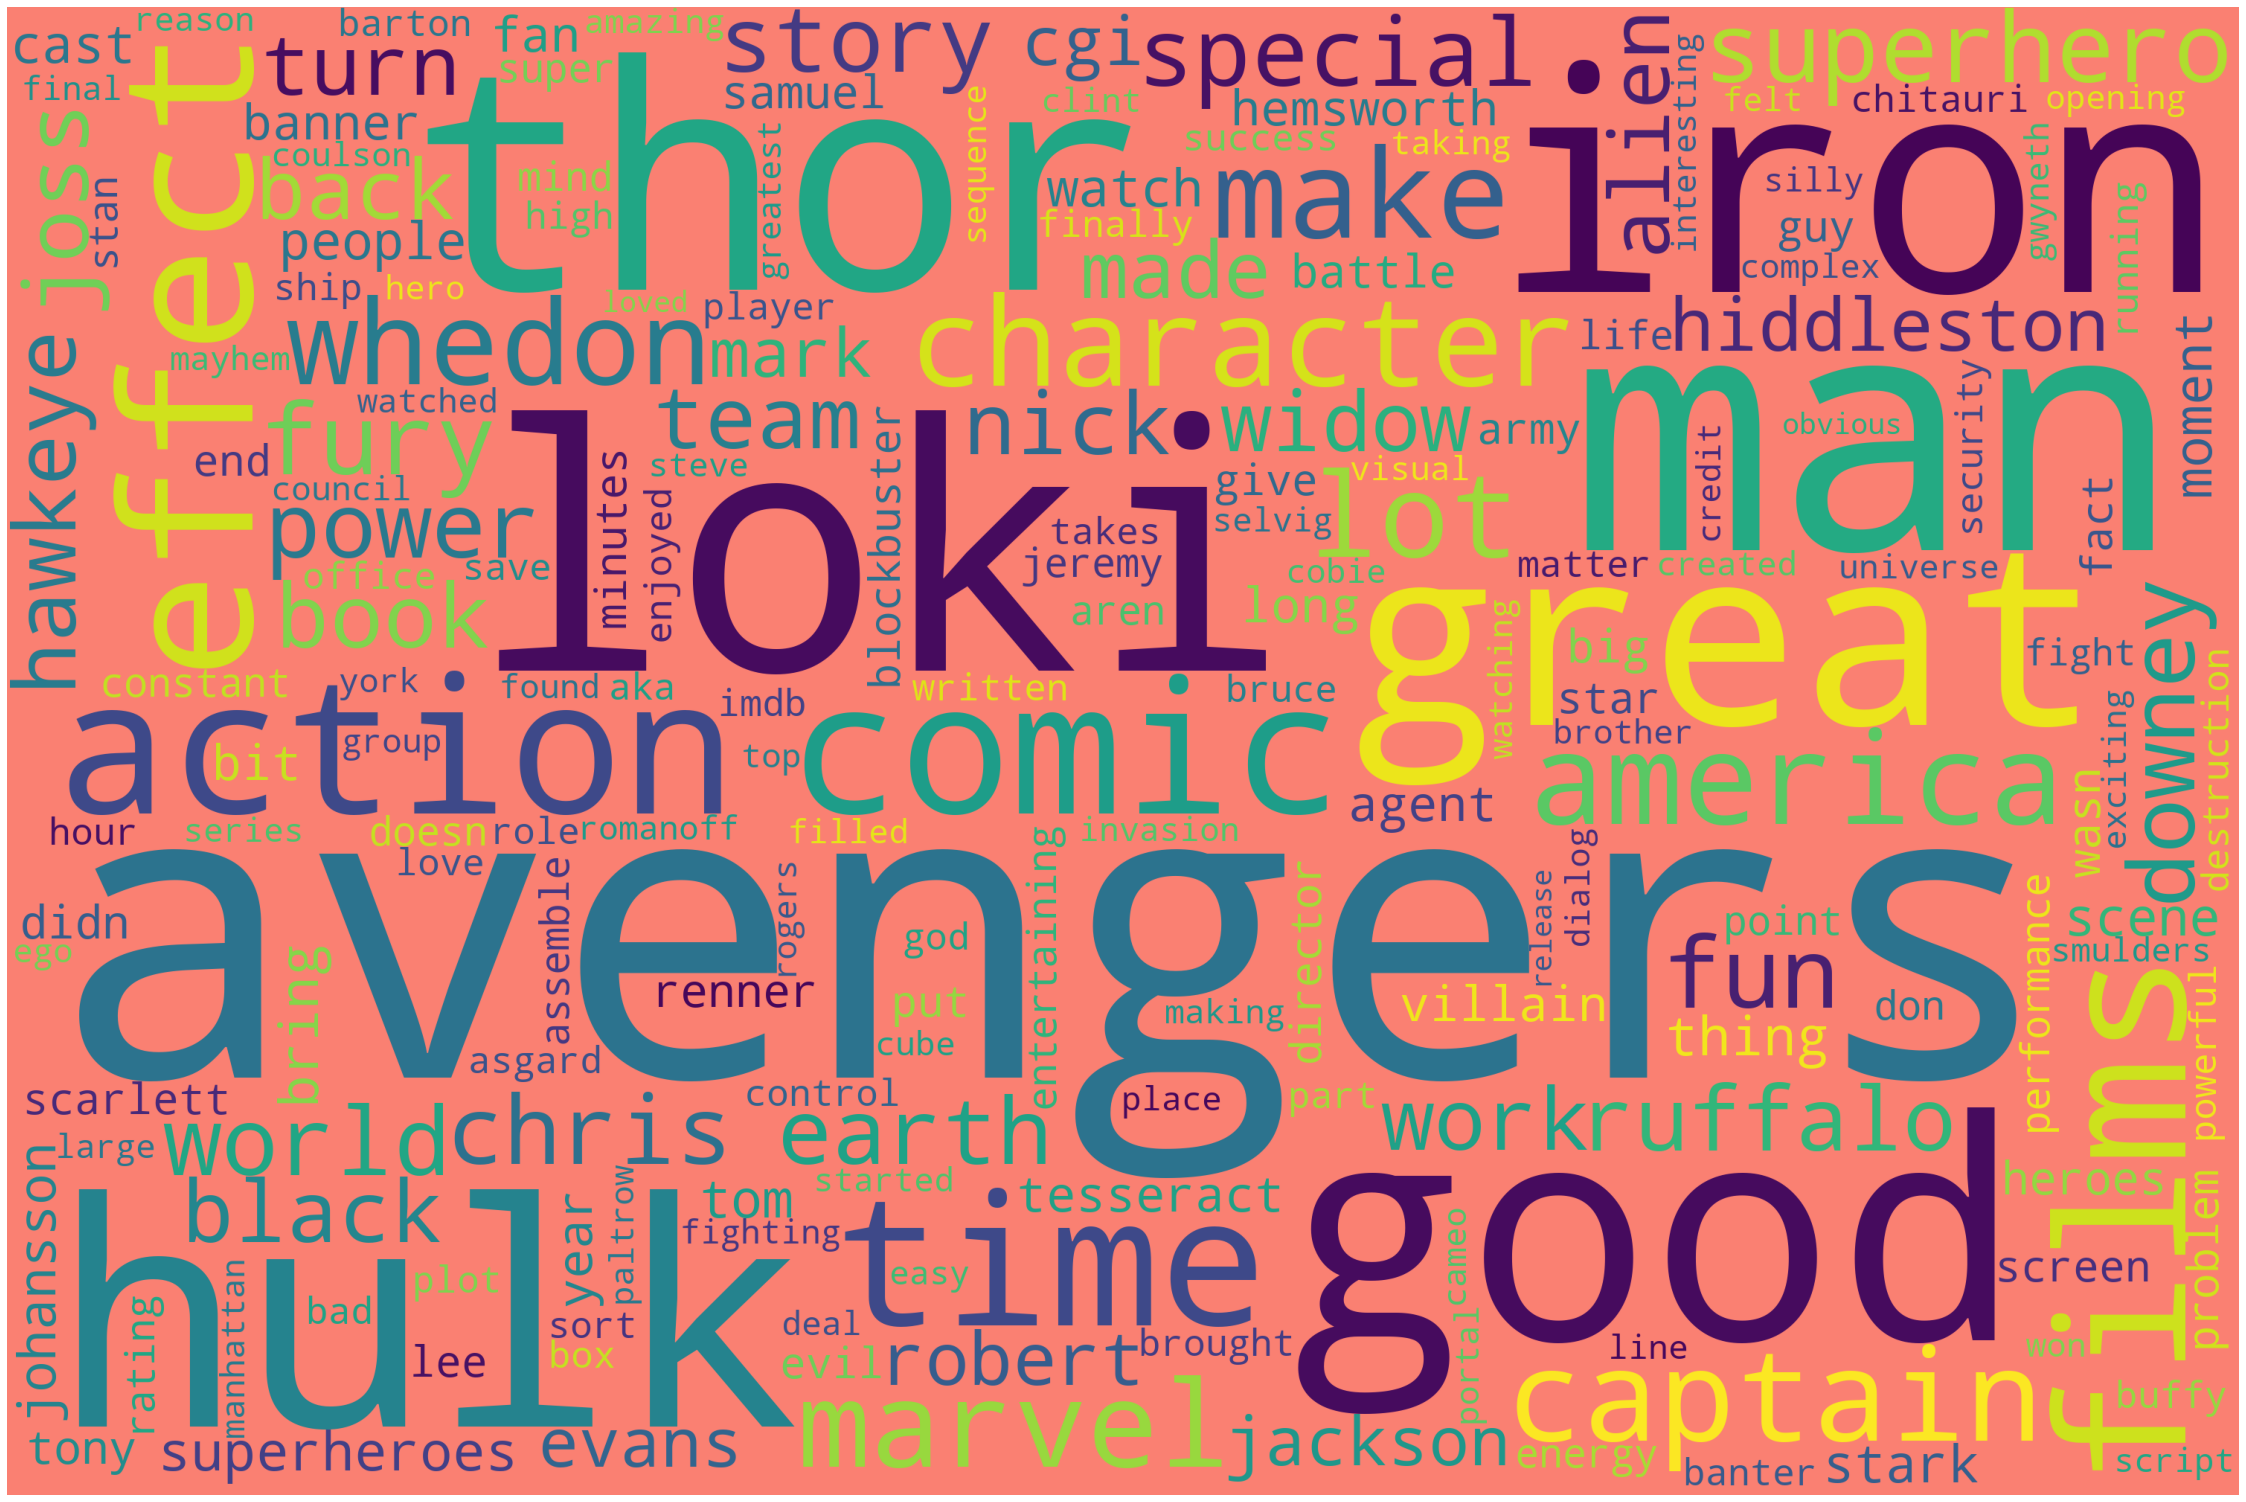

In [22]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='salmon',
                      colormap='viridis', collocations=False, stopwords = STOPWORDS).generate(clean_rev_string) 
plot_cloud(wordcloud)

In [23]:
with open("positive-words.txt") as pos:
    poswords = pos.read().split("\n")

In [24]:
positive_rev = " ".join ([w for w in rev_words if w in poswords])

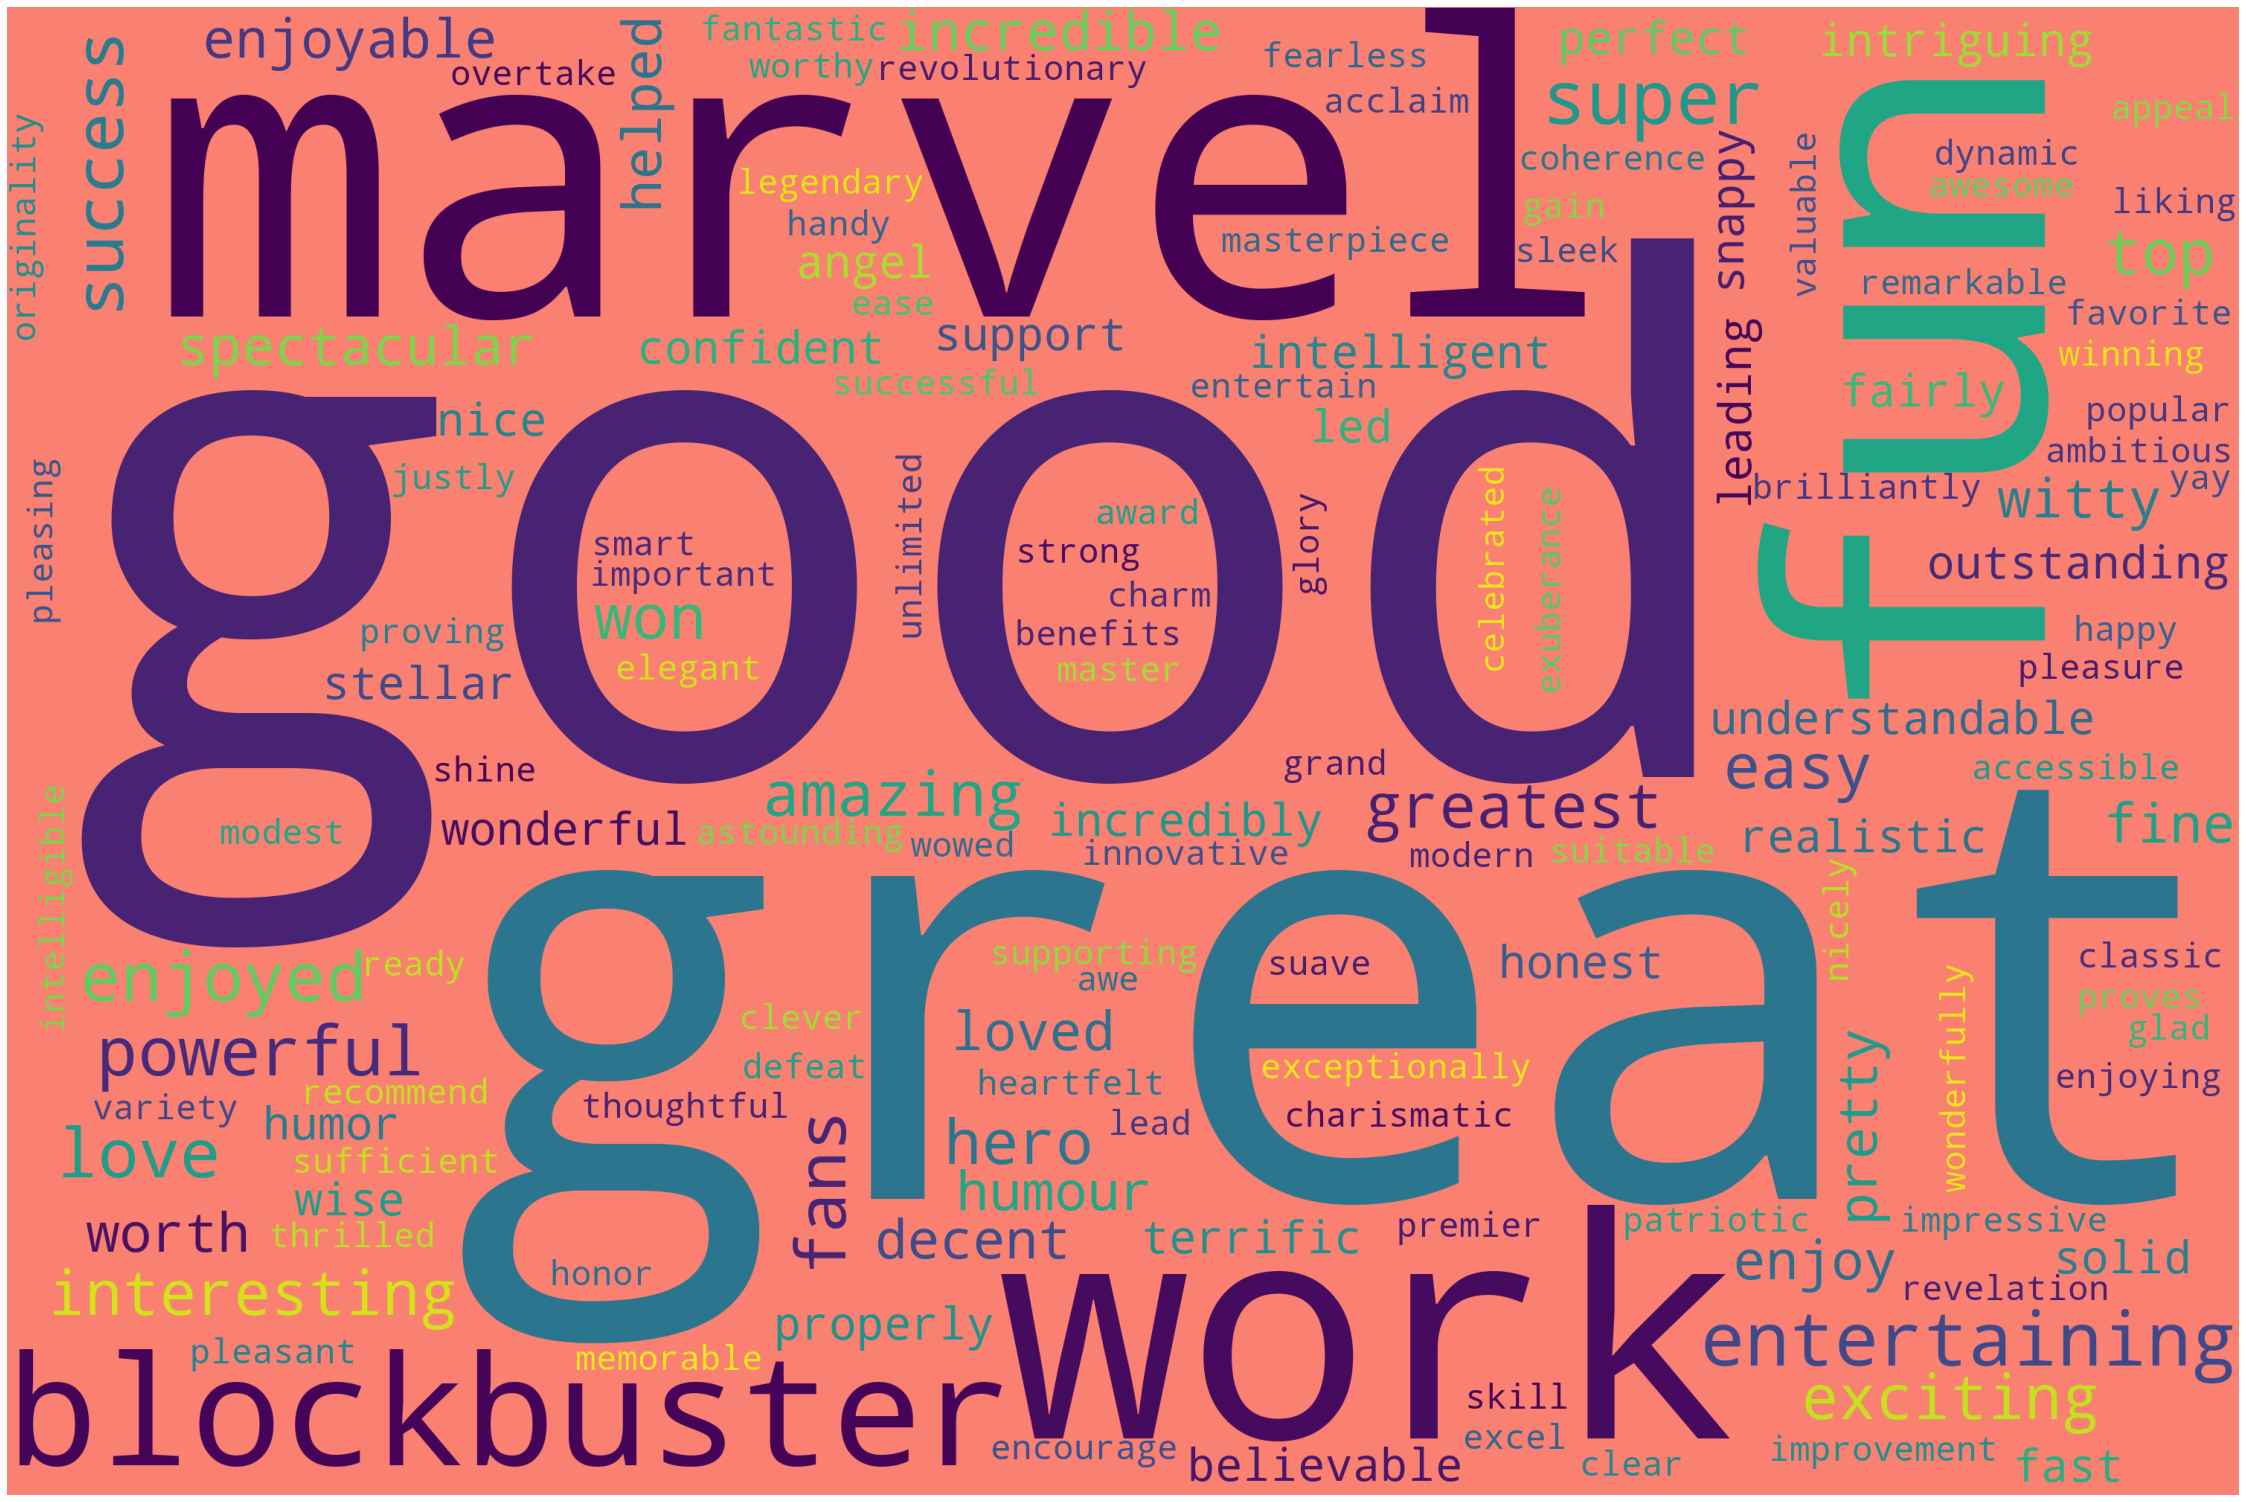

In [25]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='salmon',
                      colormap='viridis', collocations=False, stopwords = STOPWORDS).generate(positive_rev) 
plot_cloud(wordcloud)

In [26]:
with open("negative-words.txt") as neg:
    negwords = neg.read().split("\n")

In [27]:
negative_rev = " ".join ([w for w in rev_words if w in negwords])

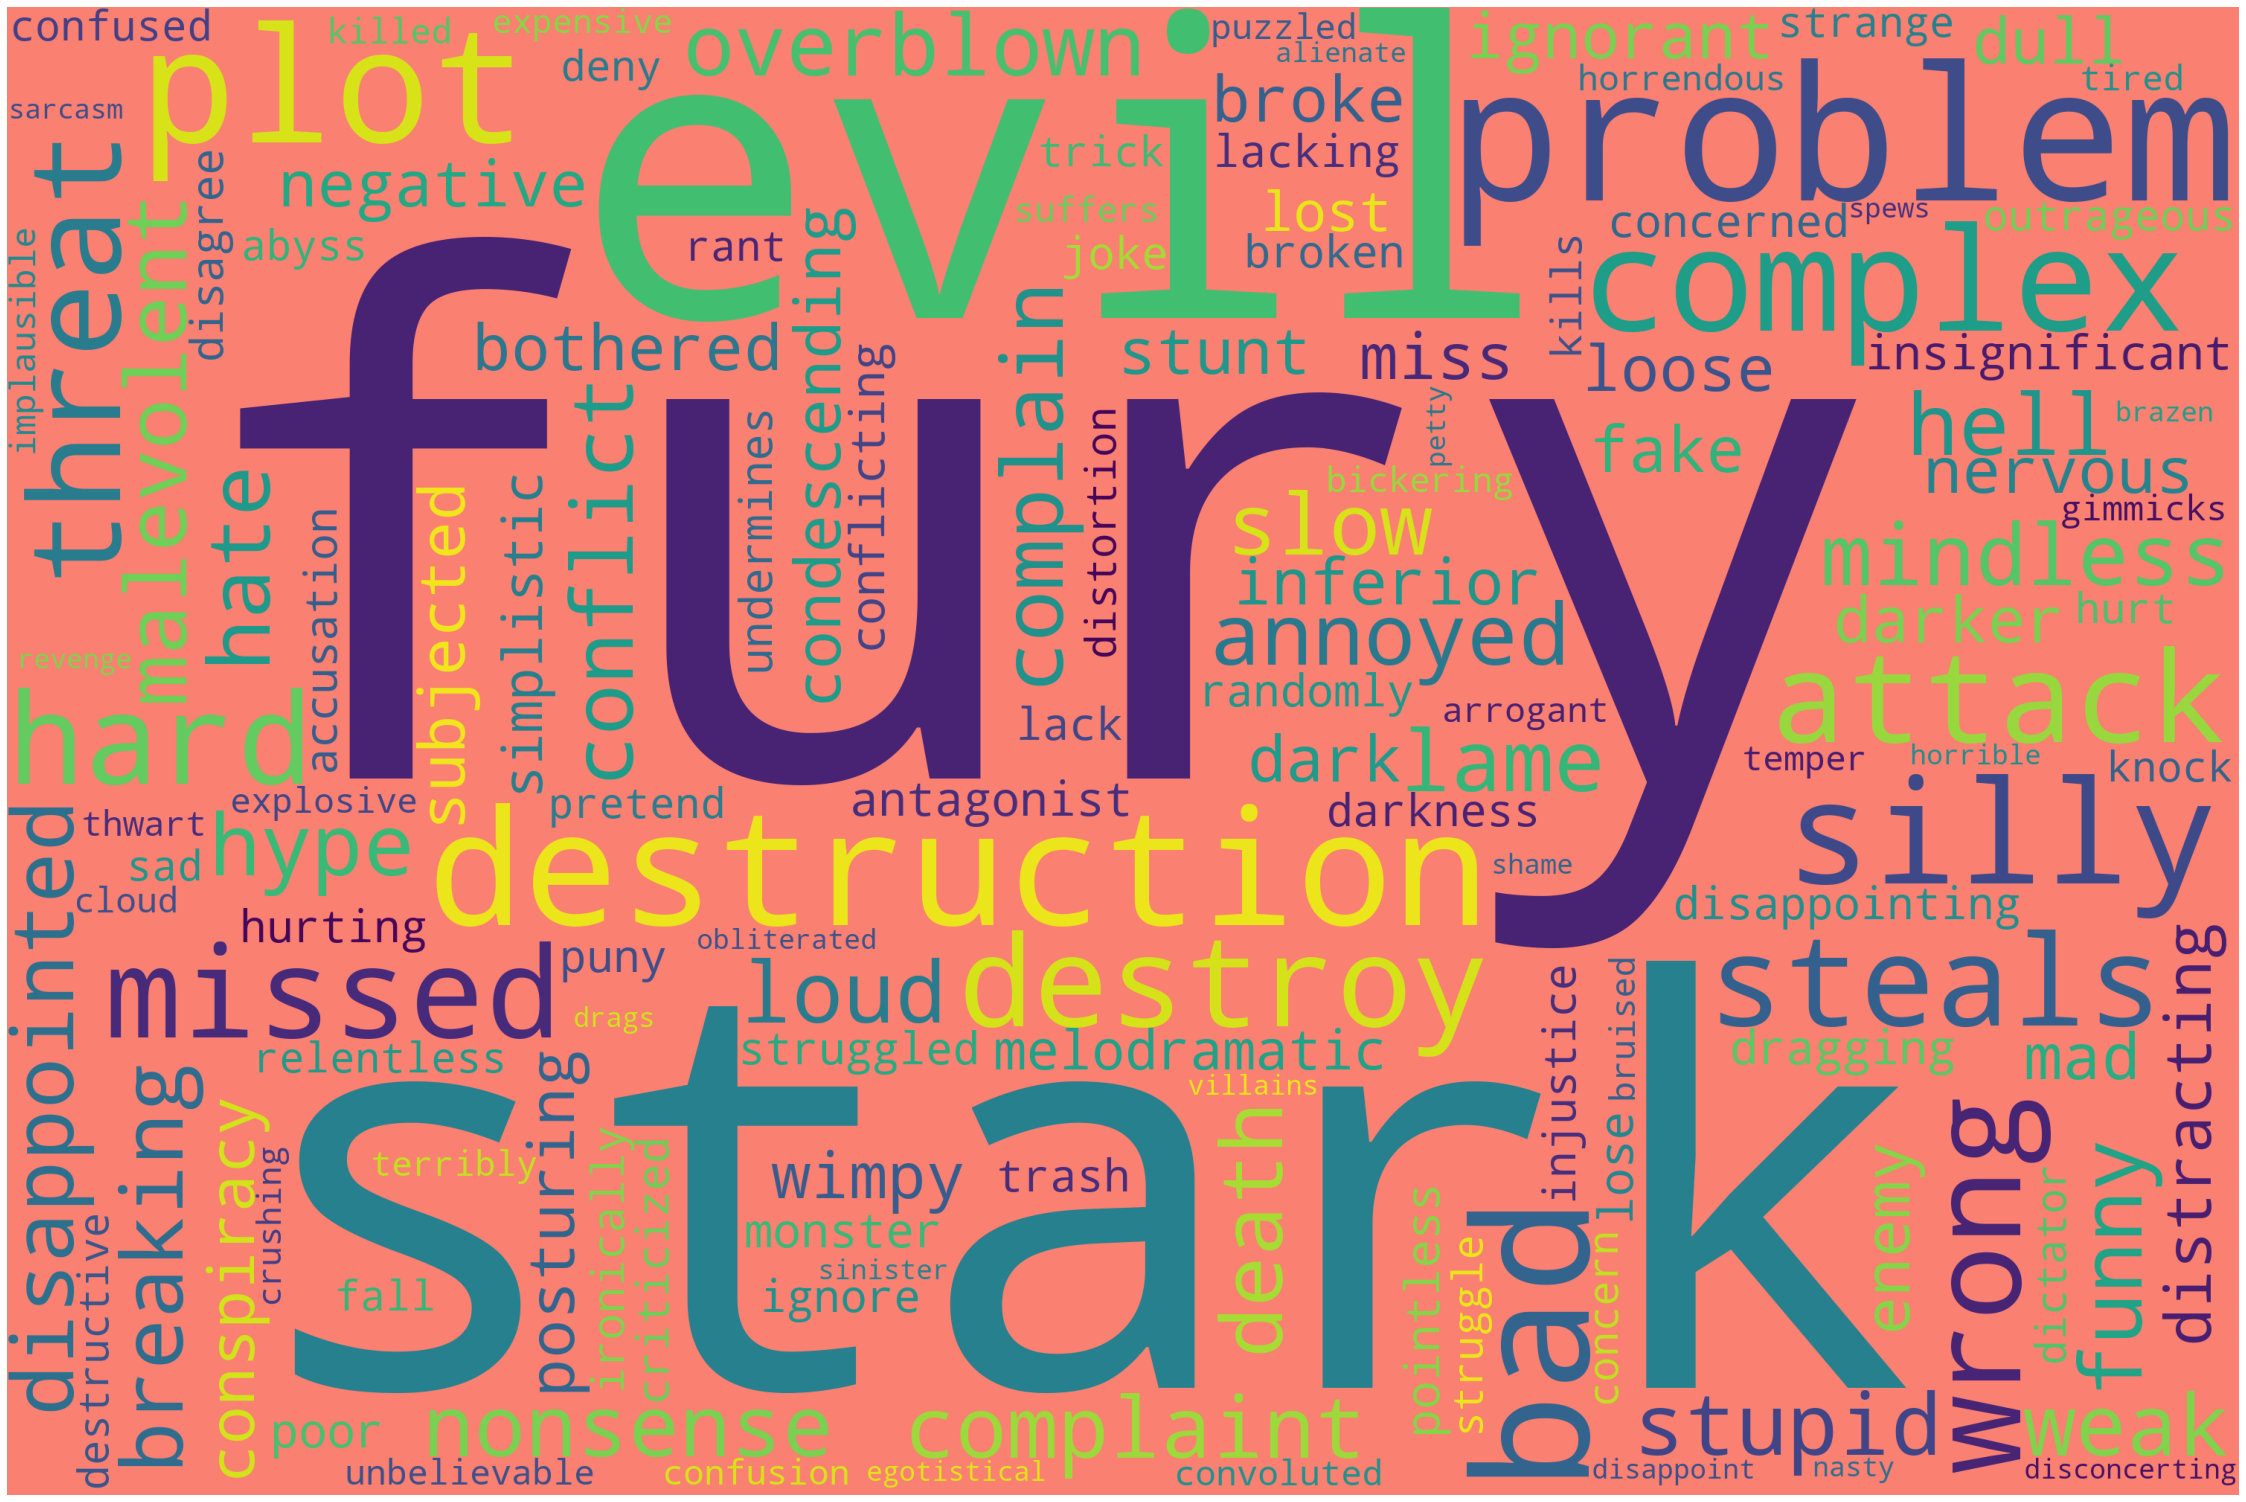

In [28]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='salmon',
                      colormap='viridis', collocations=False, stopwords = STOPWORDS).generate(negative_rev) 
plot_cloud(wordcloud)

In [29]:
WNL = nltk.WordNetLemmatizer()

In [30]:
text_content = [WNL.lemmatize(t) for t in rev_words]

In [31]:
text_content

['point',
 'avenger',
 'made',
 'trillion',
 'dollar',
 'obvious',
 'people',
 'love',
 'daughter',
 'premier',
 'york',
 'opening',
 'night',
 'general',
 'release',
 'mad',
 'didn',
 'tonight',
 'loved',
 'didn',
 'share',
 'exuberance',
 'mind',
 'preferred',
 'earlier',
 'film',
 'avenger',
 'team',
 'formed',
 'charm',
 'didn',
 'recaptured',
 'good',
 'film',
 'avenger',
 'specifically',
 'bit',
 'humor',
 'bit',
 'character',
 'development',
 'read',
 'imdb',
 'trivia',
 'originally',
 'minute',
 'showing',
 'steve',
 'rogers',
 'captain',
 'america',
 'adjust',
 'life',
 'loved',
 'huge',
 'battle',
 'end',
 'felt',
 'numbing',
 'weren',
 'fighting',
 'earlier',
 'marvel',
 'disney',
 'film',
 'bit',
 'cent',
 'worth',
 'superhero',
 'film',
 'fun',
 'watch',
 'degree',
 'understandable',
 'people',
 'wouldn',
 'totally',
 'enamoured',
 'lot',
 'negative',
 'comment',
 'lot',
 'condescending',
 'ignorant',
 'conspiracy',
 'theory',
 'worthy',
 'called',
 'review',
 'avenger',
 

In [32]:
bigrams_list = list(nltk.bigrams(text_content))
print(bigrams_list)

[('point', 'avenger'), ('avenger', 'made'), ('made', 'trillion'), ('trillion', 'dollar'), ('dollar', 'obvious'), ('obvious', 'people'), ('people', 'love'), ('love', 'daughter'), ('daughter', 'premier'), ('premier', 'york'), ('york', 'opening'), ('opening', 'night'), ('night', 'general'), ('general', 'release'), ('release', 'mad'), ('mad', 'didn'), ('didn', 'tonight'), ('tonight', 'loved'), ('loved', 'didn'), ('didn', 'share'), ('share', 'exuberance'), ('exuberance', 'mind'), ('mind', 'preferred'), ('preferred', 'earlier'), ('earlier', 'film'), ('film', 'avenger'), ('avenger', 'team'), ('team', 'formed'), ('formed', 'charm'), ('charm', 'didn'), ('didn', 'recaptured'), ('recaptured', 'good'), ('good', 'film'), ('film', 'avenger'), ('avenger', 'specifically'), ('specifically', 'bit'), ('bit', 'humor'), ('humor', 'bit'), ('bit', 'character'), ('character', 'development'), ('development', 'read'), ('read', 'imdb'), ('imdb', 'trivia'), ('trivia', 'originally'), ('originally', 'minute'), ('mi

In [33]:
dictionary = [' '.join(tup) for tup in bigrams_list]
print (dictionary)

['point avenger', 'avenger made', 'made trillion', 'trillion dollar', 'dollar obvious', 'obvious people', 'people love', 'love daughter', 'daughter premier', 'premier york', 'york opening', 'opening night', 'night general', 'general release', 'release mad', 'mad didn', 'didn tonight', 'tonight loved', 'loved didn', 'didn share', 'share exuberance', 'exuberance mind', 'mind preferred', 'preferred earlier', 'earlier film', 'film avenger', 'avenger team', 'team formed', 'formed charm', 'charm didn', 'didn recaptured', 'recaptured good', 'good film', 'film avenger', 'avenger specifically', 'specifically bit', 'bit humor', 'humor bit', 'bit character', 'character development', 'development read', 'read imdb', 'imdb trivia', 'trivia originally', 'originally minute', 'minute showing', 'showing steve', 'steve rogers', 'rogers captain', 'captain america', 'america adjust', 'adjust life', 'life loved', 'loved huge', 'huge battle', 'battle end', 'end felt', 'felt numbing', 'numbing weren', 'weren

In [34]:
vectorizer1 = TfidfVectorizer(ngram_range = (2, 2))
bag_of_words = vectorizer1.fit_transform(dictionary)
vectorizer1.vocabulary_

{'point avenger': 2049,
 'avenger made': 195,
 'made trillion': 1701,
 'trillion dollar': 2798,
 'dollar obvious': 757,
 'obvious people': 1923,
 'people love': 1987,
 'love daughter': 1682,
 'daughter premier': 647,
 'premier york': 2098,
 'york opening': 3030,
 'opening night': 1935,
 'night general': 1896,
 'general release': 1147,
 'release mad': 2212,
 'mad didn': 1690,
 'didn tonight': 715,
 'tonight loved': 2771,
 'loved didn': 1686,
 'didn share': 713,
 'share exuberance': 2367,
 'exuberance mind': 951,
 'mind preferred': 1830,
 'preferred earlier': 2097,
 'earlier film': 789,
 'film avenger': 1016,
 'avenger team': 210,
 'team formed': 2654,
 'formed charm': 1082,
 'charm didn': 477,
 'didn recaptured': 712,
 'recaptured good': 2197,
 'good film': 1189,
 'avenger specifically': 207,
 'specifically bit': 2470,
 'bit humor': 309,
 'humor bit': 1409,
 'bit character': 303,
 'character development': 458,
 'development read': 700,
 'read imdb': 2181,
 'imdb trivia': 1430,
 'trivia 

In [35]:
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer1.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

In [36]:
words_freq

[('iron man', 260.0),
 ('captain america', 210.0),
 ('comic book', 140.0),
 ('nick fury', 130.0),
 ('joss whedon', 120.0),
 ('robert downey', 110.0),
 ('black widow', 110.0),
 ('special effect', 110.0),
 ('mark ruffalo', 100.0),
 ('tom hiddleston', 90.0),
 ('chris evans', 90.0),
 ('samuel jackson', 80.0),
 ('tony stark', 80.0),
 ('chris hemsworth', 70.0),
 ('jeremy renner', 60.0),
 ('scarlett johansson', 60.0),
 ('stan lee', 60.0),
 ('avenger assemble', 50.0),
 ('super hero', 50.0),
 ('box office', 50.0),
 ('loki tom', 50.0),
 ('thor chris', 50.0),
 ('fury samuel', 50.0),
 ('bruce banner', 50.0),
 ('steve rogers', 40.0),
 ('stark iron', 40.0),
 ('man robert', 40.0),
 ('america chris', 40.0),
 ('banner hulk', 40.0),
 ('hulk mark', 40.0),
 ('widow scarlett', 40.0),
 ('clint barton', 40.0),
 ('america iron', 40.0),
 ('cobie smulders', 40.0),
 ('gwyneth paltrow', 40.0),
 ('character development', 30.0),
 ('rogers captain', 30.0),
 ('book fan', 30.0),
 ('alien invasion', 30.0),
 ('fury brin

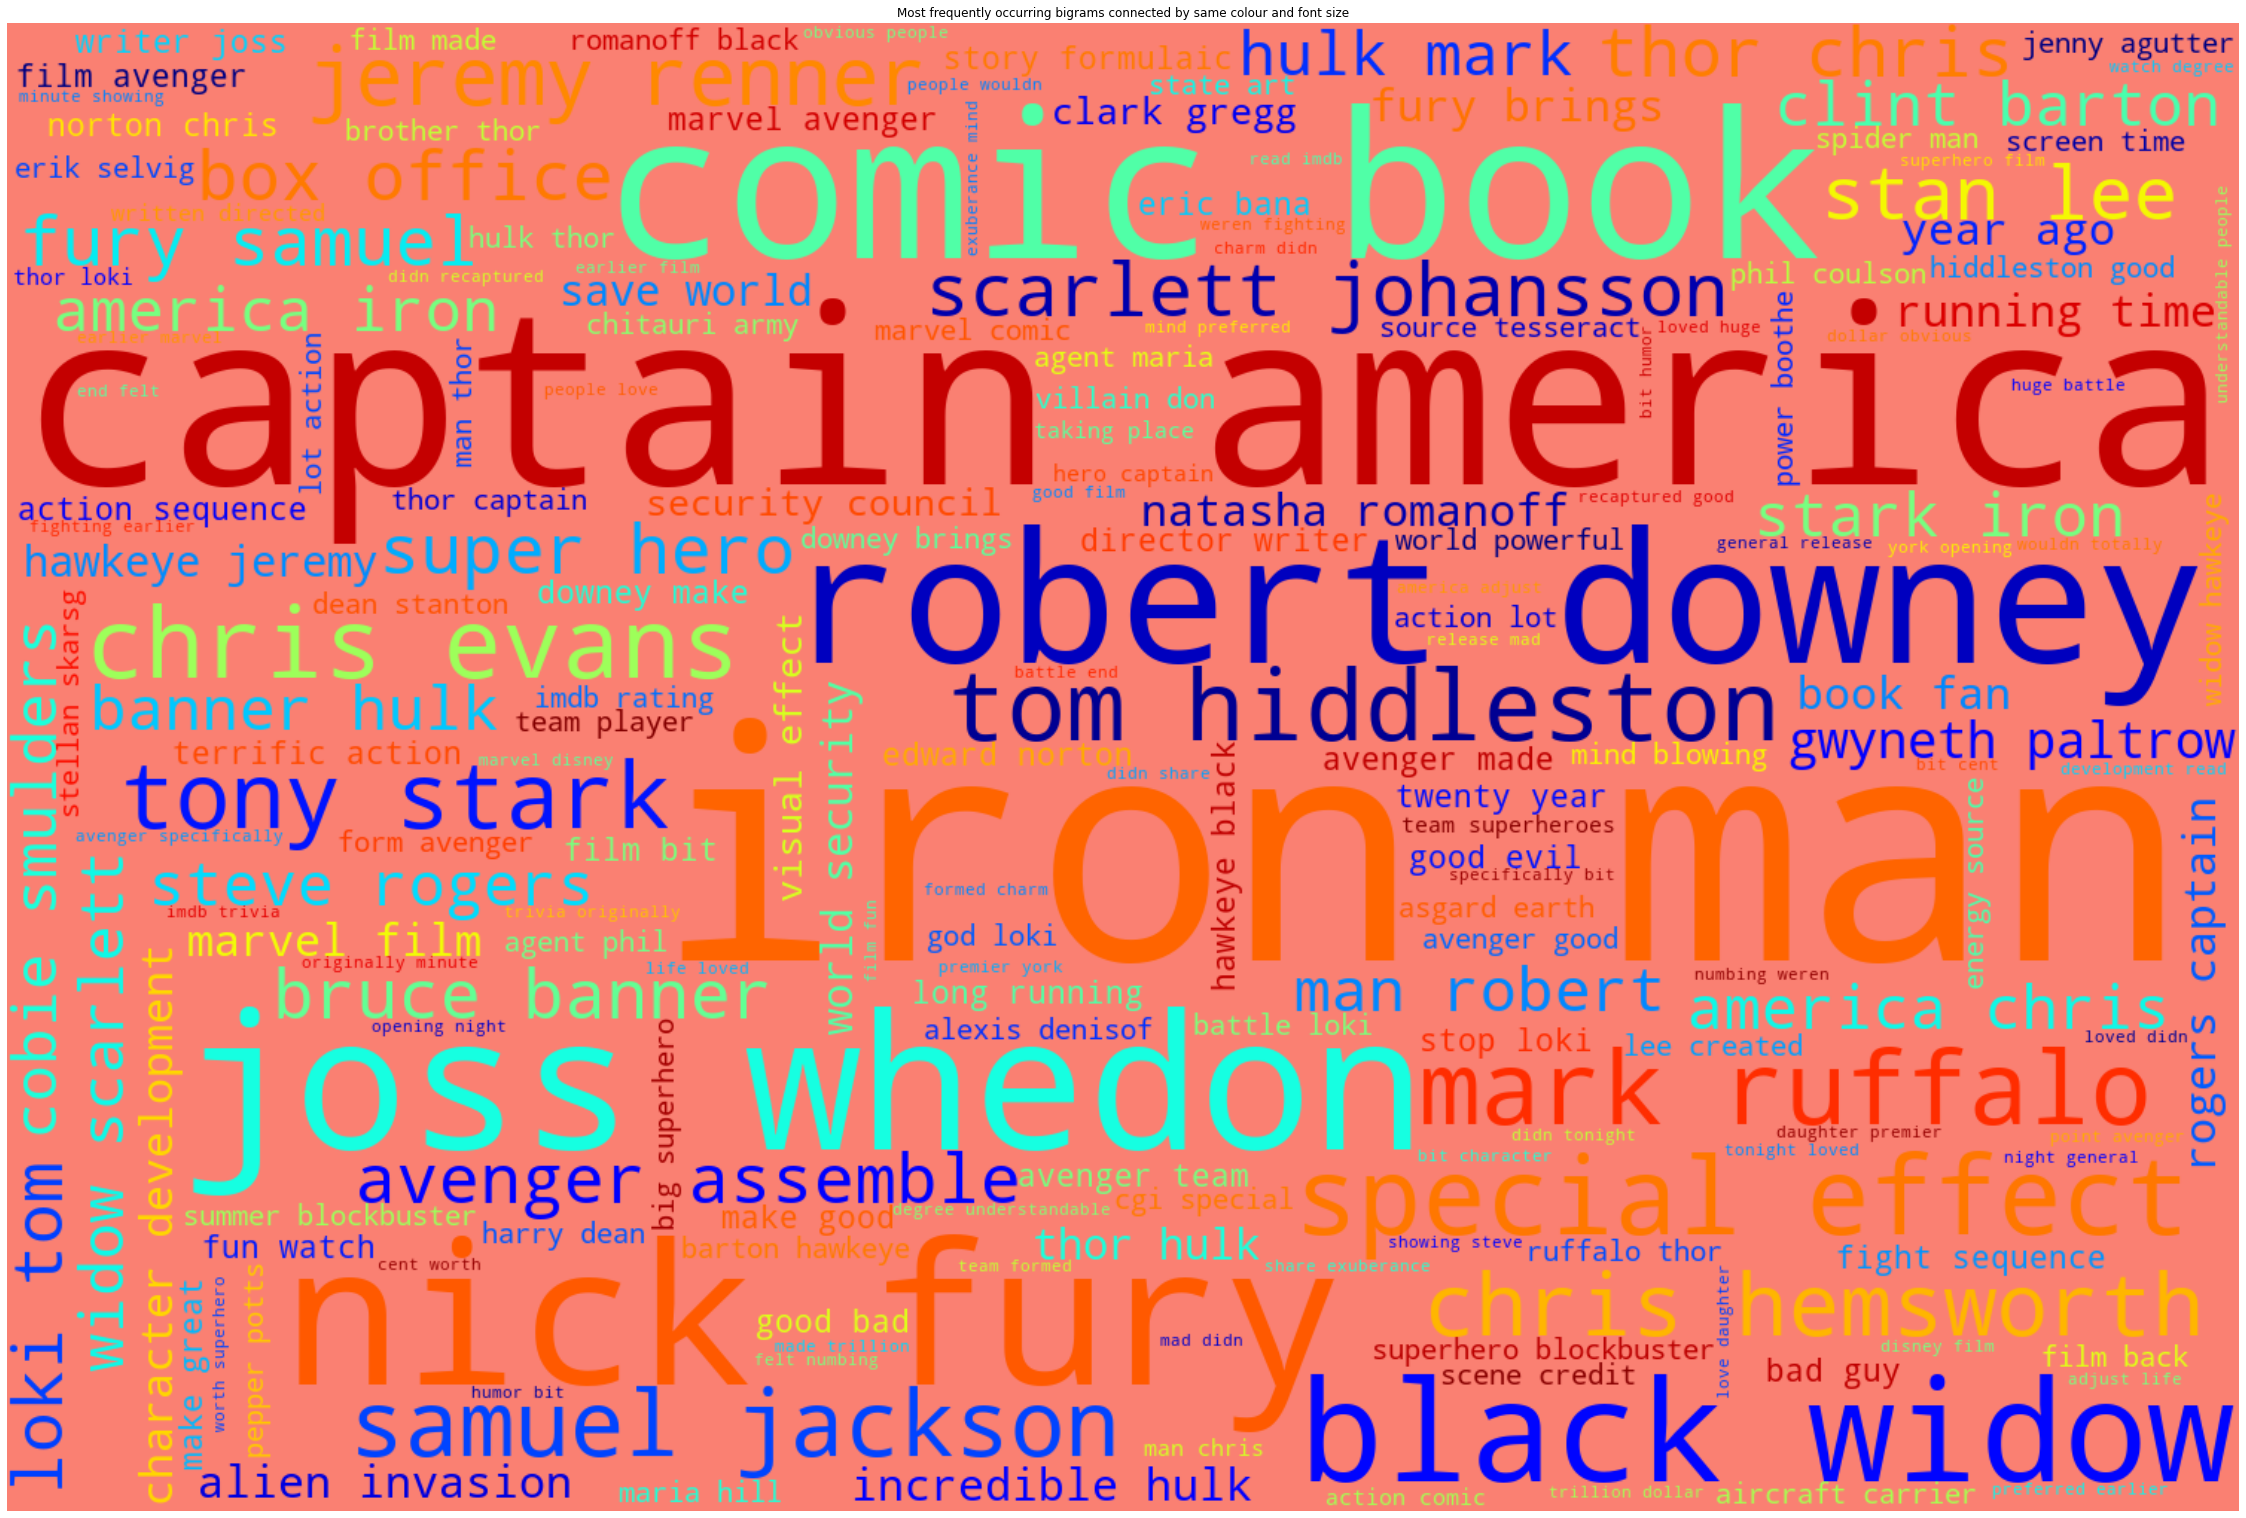

In [38]:
# Generating wordcloud
words_dict = dict(words_freq)
WC_height = 1000
WC_width = 1500
WC_max_words = 200
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,
                      stopwords=STOPWORDS, background_color='salmon', colormap='jet')
wordCloud.generate_from_frequencies(words_dict)

plt.figure(figsize=(40, 30))
plt.title('Most frequently occurring bigrams connected by same colour and font size')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()